In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
#train image data
train_df = "/content/drive/MyDrive/AI&ML --- Level 6 /Datasets/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/AI&ML --- Level 6 /Datasets/FruitinAmazon/train"

In [4]:
import os
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [5]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")


No corrupted images found.


In [6]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [7]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

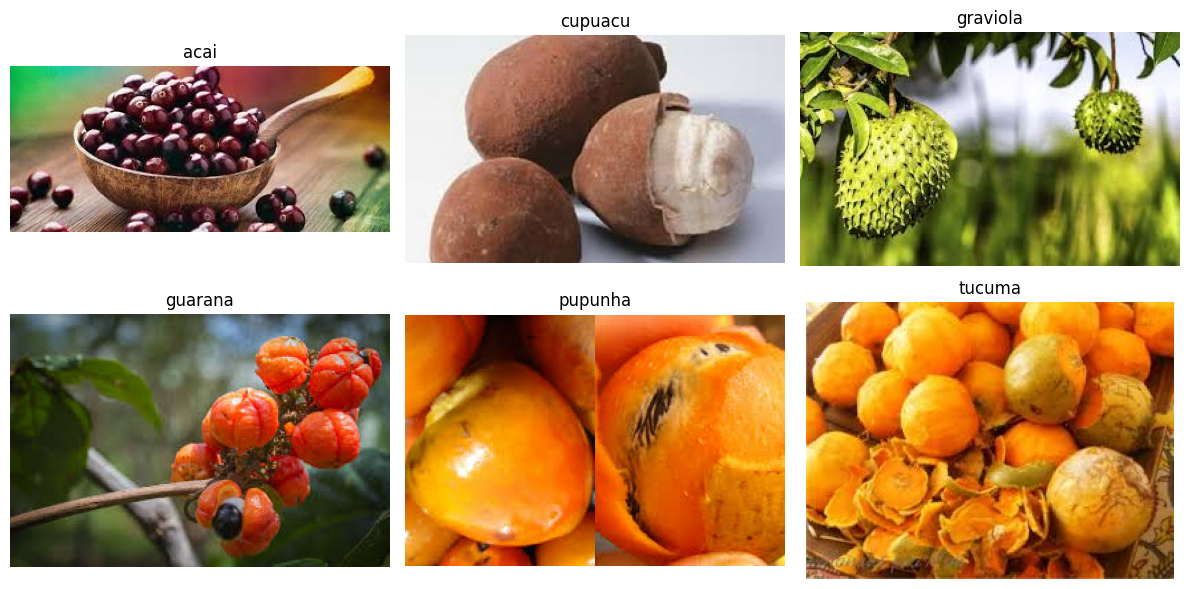

In [8]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [9]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [10]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1412 - loss: 253.9899

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1337 - loss: 279.9428 - val_accuracy: 0.1111 - val_loss: 89.7508
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.2251 - loss: 79.1483

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.2244 - loss: 77.1486 - val_accuracy: 0.2222 - val_loss: 31.0231
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.2905 - loss: 25.1602

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - accuracy: 0.2873 - loss: 24.5026 - val_accuracy: 0.1667 - val_loss: 9.3162
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.2002 - loss: 8.4708

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 546ms/step - accuracy: 0.1988 - loss: 8.2836 - val_accuracy: 0.4444 - val_loss: 3.3286
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.4797 - loss: 2.1557

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 553ms/step - accuracy: 0.4813 - loss: 2.1259 - val_accuracy: 0.1667 - val_loss: 2.8005
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.6308 - loss: 0.9247

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 803ms/step - accuracy: 0.6259 - loss: 0.9523 - val_accuracy: 0.2222 - val_loss: 2.7966
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.7766 - loss: 0.5802

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.7665 - loss: 0.6033 - val_accuracy: 0.2222 - val_loss: 2.7084
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.7697 - loss: 0.5476

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.7717 - loss: 0.5448 - val_accuracy: 0.3333 - val_loss: 2.2022
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.8646 - loss: 0.3737

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.8672 - loss: 0.3700 - val_accuracy: 0.2222 - val_loss: 2.0684
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.9705 - loss: 0.2504 - val_accuracy: 0.2778 - val_loss: 2.2382
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step - accuracy: 1.0000 - loss: 0.1100 - val_accuracy: 0.3333 - val_loss: 2.5053
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 744ms/step - accuracy: 1.0000 - loss: 0.0698 - val_accuracy: 0.2778 - val_loss: 2.6406
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step - accuracy: 1.0000 - loss: 0.0348 - val_accuracy: 0.2778 - val_loss: 2.7740
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 0.3333 - val_loss: 2.8745
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.3333 - val_loss: 2.8965
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 762ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.3333 - val_lo

In [13]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.2222 - loss: 2.0684
Test Accuracy: 0.2222
Test Loss: 2.0684


In [14]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [15]:
from sklearn.metrics import classification_report

In [16]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
              precision    recall  f1-score   support

        acai       0.50      0.67      0.57         3
     cupuacu       0.00      0.00      0.00         4
    graviola       0.17      1.00      0.29         1
     guarana       0.20      0.33      0.25         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.22        18
   macro avg       0.14      0.33      0.18        18
weighted avg       0.13      0.22      0.15        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [19]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1348 - loss: 2.3224

3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.1359 - loss: 2.3085 - val_accuracy: 0.2778 - val_loss: 1.7828
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1591 - loss: 2.2522

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1645 - loss: 2.2452 - val_accuracy: 0.2222 - val_loss: 1.7648
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3837 - loss: 1.6118

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3919 - loss: 1.6038 - val_accuracy: 0.2222 - val_loss: 1.7534
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4175 - loss: 1.4971 - val_accuracy: 0.2222 - val_loss: 1.7787
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4844 - loss: 1.3390 - val_accuracy: 0.2222 - val_loss: 1.8458
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4883 - loss: 1.1801 - val_accuracy: 0.2222 - val_loss: 1.9022
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4735 - loss: 1.2759 - val_accuracy: 0.2222 - val_loss: 1.9337
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.5512 - loss: 1.2213 - val_accuracy: 0.2222 - val_loss: 2.0136
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6693 - loss: 0.9124 - val_accuracy: 0.2222 - val_loss: 2.1749
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5326 - loss: 1.0962 - val_accuracy: 0.2222 - val_loss: 2.3943
Epoch 11/50
3/3 ━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task - 2:**

To - Do:

• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

Expected Deliverables:

• Trained Model: A trained model with the frozen layers and fine-tuned output layer.

• Inference Output: Predicted class labels for the validation dataset.

• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',  # Fixed quotes from curly to straight
                  include_top=False,
                  input_shape=(128, 128, 3))  # Input shape for VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [23]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [24]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1904 - loss: 14.3914

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.1879 - loss: 14.5811 - val_accuracy: 0.4444 - val_loss: 1.9193
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.0699 - loss: 12.8004 - val_accuracy: 0.4444 - val_loss: 1.9693
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.3090 - loss: 10.4161 - val_accuracy: 0.3889 - val_loss: 2.3934
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.2422 - loss: 8.6836 - val_accuracy: 0.3889 - val_loss: 2.7296
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.3286 - loss: 7.6328 - val_accuracy: 0.3889 - val_loss: 2.8035
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3720 - loss: 9.8816 - val_accuracy: 0.3889 - val_loss: 2.6388
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4444 - loss: 1.9193
Transfer Learning Model Accuracy: 0.4444
Transfer Learning Model Loss: 1.9193

Classification Report:
              precision    recall  f1-score   support

        acai       0.67      0.67    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1001 - loss: 2.0287 

3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 22s/step - accuracy: 0.0994 - loss: 2.0273 - val_accuracy: 0.1667 - val_loss: 1.8386
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1250 - loss: 2.1011 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 23s/step - accuracy: 0.1250 - loss: 2.0825 - val_accuracy: 0.1667 - val_loss: 1.8167
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2622 - loss: 1.7957 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.2487 - loss: 1.8077 - val_accuracy: 0.2222 - val_loss: 1.7997
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1192 - loss: 1.9637 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - accuracy: 0.1241 - loss: 1.9575 - val_accuracy: 0.3333 - val_loss: 1.7836
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2205 - loss: 1.9107 

3/3 ━━━━━━━━━━━━━━━━━━━━ 56s 17s/step - accuracy: 0.2174 - loss: 1.9128 - val_accuracy: 0.3889 - val_loss: 1.7752
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2344 - loss: 1.7439 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.2383 - loss: 1.7434 - val_accuracy: 0.3333 - val_loss: 1.7722
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2309 - loss: 1.8357 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.2253 - loss: 1.8330 - val_accuracy: 0.3333 - val_loss: 1.7707
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1944 - loss: 1.7999 

3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 18s/step - accuracy: 0.1979 - loss: 1.8099 - val_accuracy: 0.3333 - val_loss: 1.7684
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1644 - loss: 1.9180 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - accuracy: 0.1684 - loss: 1.9176 - val_accuracy: 0.3333 - val_loss: 1.7656
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2650 - loss: 1.7675 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 23s/step - accuracy: 0.2648 - loss: 1.7662 - val_accuracy: 0.2778 - val_loss: 1.7636
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2853 - loss: 1.7787 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 22s/step - accuracy: 0.2834 - loss: 1.7893 - val_accuracy: 0.3333 - val_loss: 1.7585
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2957 - loss: 1.7792 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.2912 - loss: 1.7844 - val_accuracy: 0.3333 - val_loss: 1.7512
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2494 - loss: 1.8002 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.2530 - loss: 1.7948 - val_accuracy: 0.3889 - val_loss: 1.7427
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2147 - loss: 1.7711 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - accuracy: 0.2166 - loss: 1.7702 - val_accuracy: 0.3889 - val_loss: 1.7348
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2749 - loss: 1.7170 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.2756 - loss: 1.7177 - val_accuracy: 0.3889 - val_loss: 1.7276
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2141 - loss: 1.7777 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.2196 - loss: 1.7781 - val_accuracy: 0.3889 - val_loss: 1.7192
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2795 - loss: 1.6531 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.2826 - loss: 1.6505 - val_accuracy: 0.3889 - val_loss: 1.7093
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2303 - loss: 1.7112 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.2283 - loss: 1.7129 - val_accuracy: 0.3889 - val_loss: 1.6995
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3194 - loss: 1.6242 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.3229 - loss: 1.6193 - val_accuracy: 0.4444 - val_loss: 1.6939
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2743 - loss: 1.6639 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - accuracy: 0.2786 - loss: 1.6609 - val_accuracy: 0.5000 - val_loss: 1.6923
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 22s/step - accuracy: 0.3928 - loss: 1.6370 - val_accuracy: 0.5000 - val_loss: 1.6934
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3704 - loss: 1.6045 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 22s/step - accuracy: 0.3681 - loss: 1.6064 - val_accuracy: 0.4444 - val_loss: 1.6920
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3860 - loss: 1.5528 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.3798 - loss: 1.5585 - val_accuracy: 0.3889 - val_loss: 1.6911
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2593 - loss: 1.7069 

3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 17s/step - accuracy: 0.2639 - loss: 1.6976 - val_accuracy: 0.3889 - val_loss: 1.6873
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3657 - loss: 1.4924 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 18s/step - accuracy: 0.3611 - loss: 1.4992 - val_accuracy: 0.4444 - val_loss: 1.6814
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.4462 - loss: 1.5485 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.4388 - loss: 1.5587 - val_accuracy: 0.4444 - val_loss: 1.6786
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.4005 - loss: 1.6152 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.3976 - loss: 1.6120 - val_accuracy: 0.4444 - val_loss: 1.6780
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3345 - loss: 1.6769 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.3377 - loss: 1.6726 - val_accuracy: 0.4444 - val_loss: 1.6772
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 17s/step - accuracy: 0.3524 - loss: 1.6239 - val_accuracy: 0.5000 - val_loss: 1.6773
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 17s/step - accuracy: 0.3750 - loss: 1.5788 - val_accuracy: 0.5000 - val_loss: 1.6781
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.4444 - loss: 1.6772

Transfer Learning Model Accuracy: 0.4444
Transfer Learning Model Loss: 1.6772

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.33      0.50         3
     cupuacu       0.60      0.75      0.67         4
    graviola       0.33      1.00      0.50         1
     guarana       0.50      0.67      0.57         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.20      0.33      0.25         3

    accuracy                           0.44        18
   macro avg       0.44  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
